In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
gpus = tf.config.list_physical_devices('GPU')

In [4]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub 
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.13.0
TF Hub version: 0.14.0
GPU not available :(


In [5]:
# Getting our data
import pandas as pd
labels_csv=pd.read_csv("./dog-breed-identification/labels.csv")
(labels_csv.describe())

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [6]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

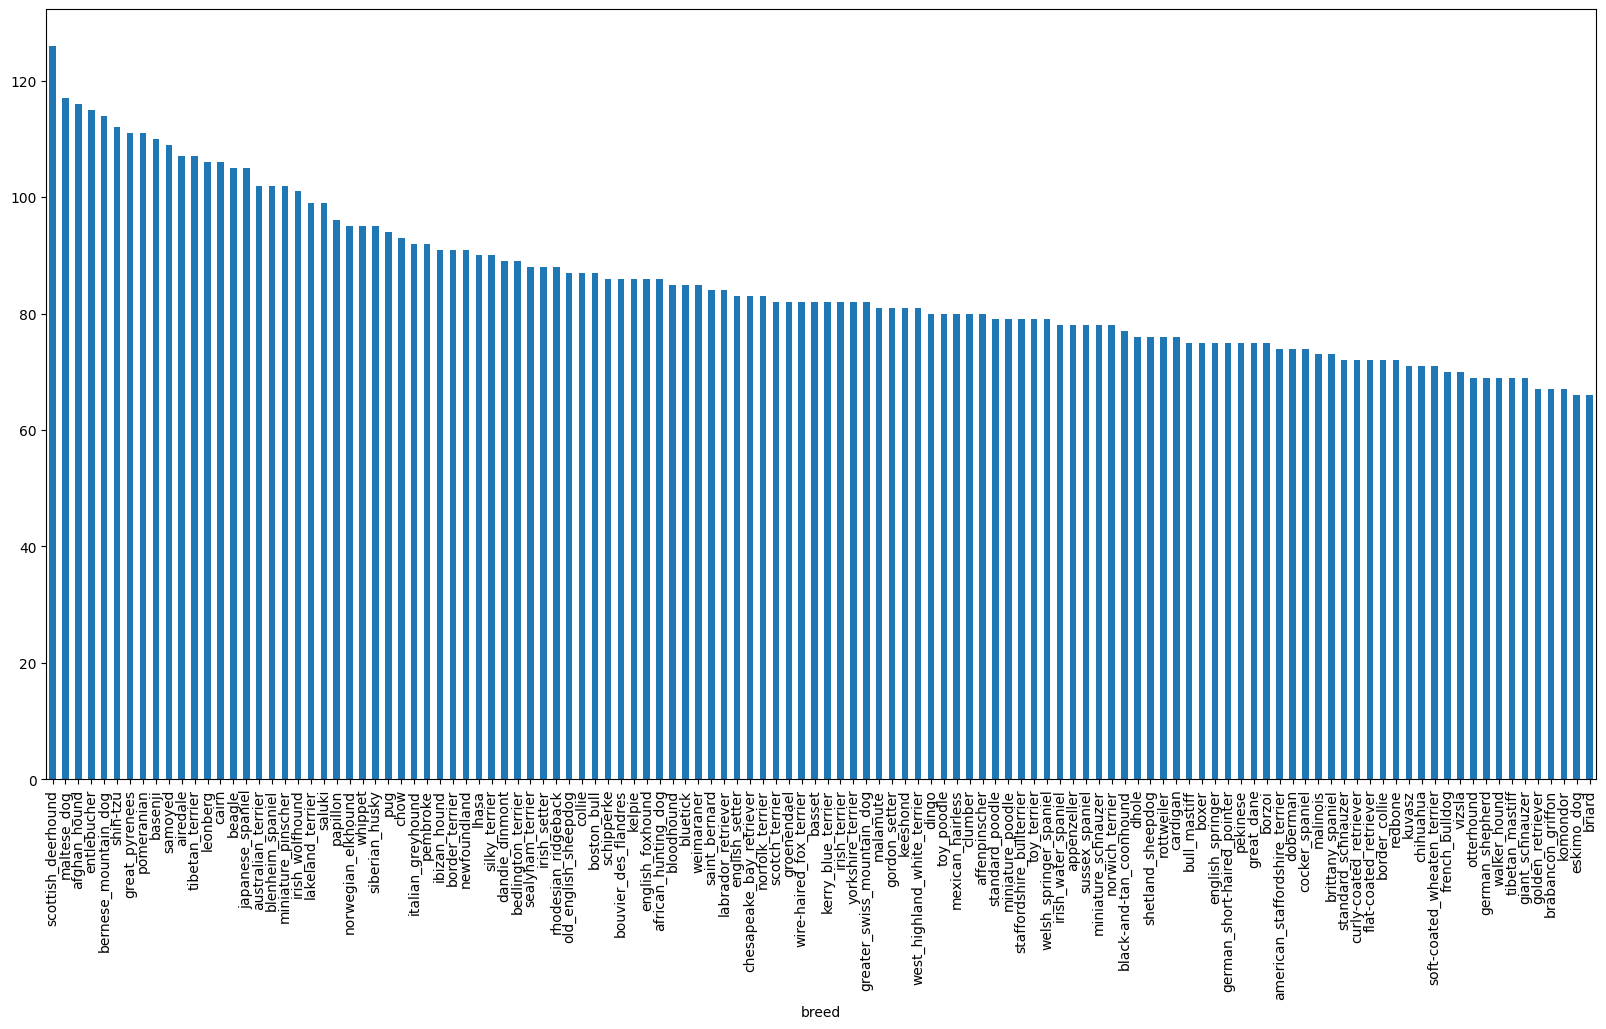

In [7]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [8]:
labels_csv["breed"].value_counts().median()

82.0

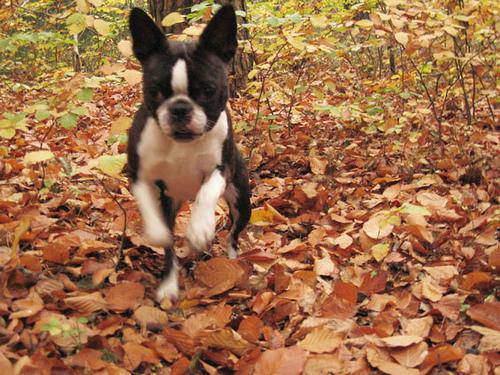

In [9]:
from IPython.display import Image
Image("./dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [10]:
# Create pathnames from image ID's 
filenames=["./dog-breed-identification/train/" +  fname + ".jpg" for fname in labels_csv["id"]]

filenames[:10]

['./dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 './dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 './dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 './dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 './dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 './dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 './dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 './dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 './dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 './dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [11]:
# Check whether number of filenames matches number of actual image files

import os
if len(os.listdir("./dog-breed-identification/train"))==len(filenames):
    print("Filenames match actual amount of files!!")
else:
    print("Filenames don't match actual amount of files")
    

Filenames match actual amount of files!!


In [12]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [13]:
import numpy as np
labels=labels_csv["breed"].to_numpy()
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
len(labels)

10222

In [15]:
# See if number of labela matches the number of filenames
if len(labels)==len(filenames):
    print("Number of labels matches number of filenames!")
else:
    print("Number of labels does not match numbers of filenames,check data directories!")

Number of labels matches number of filenames!


In [16]:
# Finf the unique label values
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [17]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
# turn every label into boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
len(labels)

10222

In [20]:
# Example:Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [21]:
filenames[42]

'./dog-breed-identification/train/011e06760794850c40f23d6426c40774.jpg'

In [22]:
# Setup x and y variables
X=filenames
y=boolean_labels

In [23]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000} 

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)
len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

*Turning images into tesnor*

In [25]:
# Convert image into numpy array
from matplotlib.pyplot import imread
image=imread(filenames[9])
image.shape

(332, 500, 3)

In [26]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[  5,   6,   0],
        [  5,   6,   0],
        [  6,   7,   0],
        ...,
        [ 90, 100,  40],
        [ 88,  98,  38],
        [ 86,  96,  36]],

       [[  6,   7,   0],
        [  7,   8,   0],
        [  7,   8,   0],
        ...,
        [ 93, 103,  42],
        [ 91, 101,  41],
        [ 90, 100,  39]]], dtype=uint8)>

In [27]:
IMG_SIZE=224
def process_image(image_path,img_size=IMG_SIZE):
    image=tf.io.read_file(image_path)      #reading an image
    image=tf.image.decode_jpeg(image,channels=3)    #convertingjpeg to tensor
    image=tf.image.convert_image_dtype(image,tf.float32)      #converting image from 0-255 to 0-1   
    image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
    
    return image

In [28]:
# Turning data into batches
def get_image_label(image_path,label):
    image=process_image(image_path)
    return image,label

In [29]:
process_image(X[42],y[42])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117759],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

In [30]:
# Define the batch size
BATCH_SIZE=32
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    if test_data:
        print("creating test data batches...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch=data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    
    elif valid_data:
        print("Creating validation data batches...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        
        data_batch=data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    
    else:
        print("Creating training data batches..")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        
        # shuffling pathnames and labels
        data=data.shuffle(buffer_size=len(X))
        
        data=data.map(get_image_label)
        
        data_batch=data.batch(BATCH_SIZE)
        
    return data_batch
        

In [31]:
# creating training and validation data batches
train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches..
Creating validation data batches...


In [32]:
# different attribute of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [33]:
# Visualizing data analysis
import matplotlib.pyplot as plt

def show_25_images(images,labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        # Display an image 
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis("off")

In [34]:
train_images,train_labels=next(train_data.as_numpy_iterator())
train_images,train_labels

(array([[[[1.24664329e-01, 1.08978055e-01, 9.72133502e-02],
          [1.35758445e-01, 1.20072179e-01, 1.08307473e-01],
          [5.53868152e-02, 3.97005379e-02, 2.79358309e-02],
          ...,
          [3.95479128e-02, 5.70733808e-02, 3.95479128e-02],
          [4.38550785e-02, 3.60119417e-02, 3.99335101e-02],
          [3.13725509e-02, 2.35294141e-02, 2.74509825e-02]],
 
         [[1.22447386e-01, 1.06761113e-01, 9.49964002e-02],
          [1.24766015e-01, 1.09079741e-01, 9.73150358e-02],
          [6.03373721e-02, 4.46510985e-02, 3.28863896e-02],
          ...,
          [3.95479128e-02, 5.70733808e-02, 3.95479128e-02],
          [4.38550785e-02, 3.60119417e-02, 3.99335101e-02],
          [3.13725509e-02, 2.35294141e-02, 2.74509825e-02]],
 
         [[1.22636564e-01, 1.06950291e-01, 9.51855853e-02],
          [1.00321934e-01, 8.46356526e-02, 7.28709474e-02],
          [7.97500610e-02, 6.40637800e-02, 5.22990748e-02],
          ...,
          [4.20515500e-02, 5.45697436e-02, 3.9547

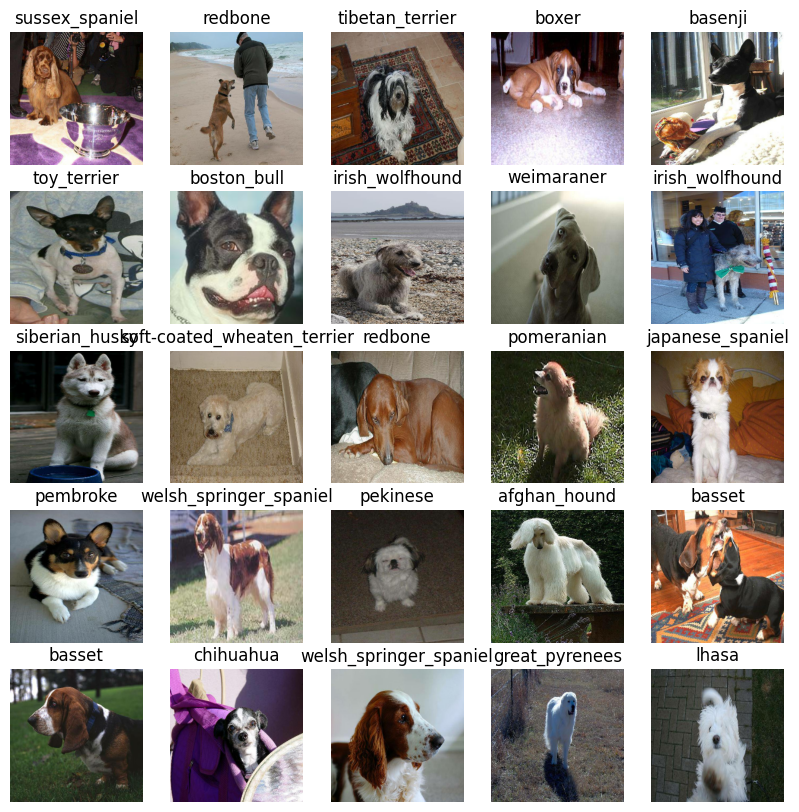

In [35]:
# Visualizze data in training batch
show_25_images(train_images,train_labels)

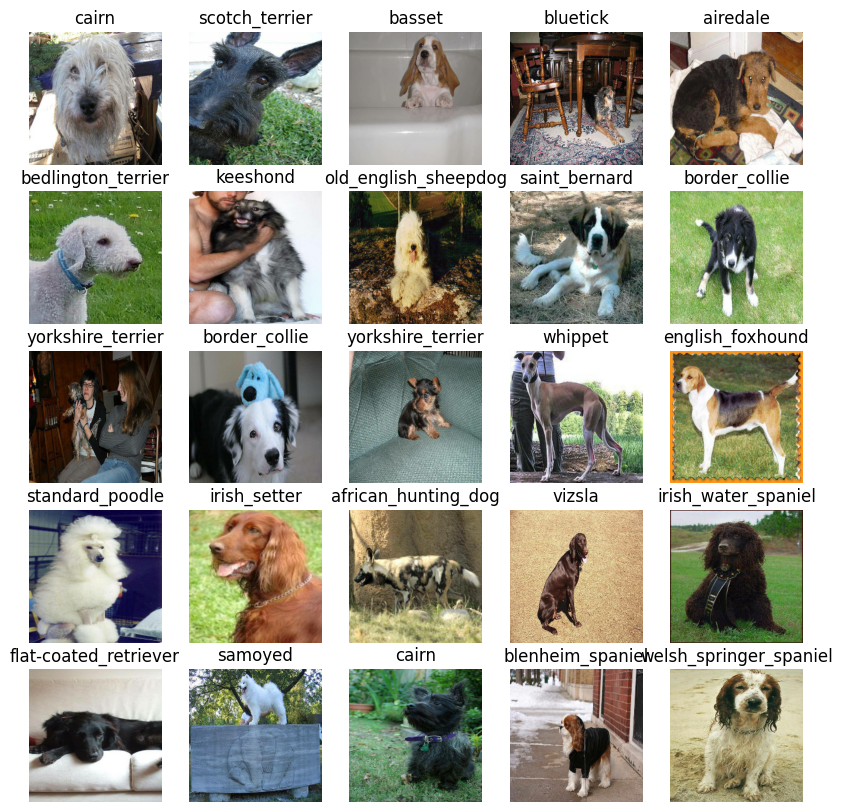

In [36]:
# Visualize our validation set
val_images,val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

In [37]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE=len(unique_breeds)
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [38]:
# Building a deep learning model using keras
from tensorflow import keras
def create_models(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
    print(f"Building model with:{MODEL_URL}")
    model=tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")
        ])
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    
    model.build(INPUT_SHAPE)
    
    return model

In [39]:
model=create_models()
model.summary()

Building model with:https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [40]:
# tensorboard extension
%load_ext tensorboard

In [41]:
import datetime

def create_tensorboard_callback():
    logdir=os.path.join("./dog-breed-identification/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [42]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

*Training our Model*


In [43]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [44]:
def train_model():
    model=create_models()
    tensorboard=create_tensorboard_callback()
    
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,
              callbacks=[tensorboard,early_stopping]
              )
    return model

In [45]:
model=train_model()

Building model with:https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Epoch 1/100
25/25 [==============================] - 21s 663ms/step - loss: 4.5774 - accuracy: 0.0812 - val_loss: 3.3688 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 15s 609ms/step - loss: 1.6176 - accuracy: 0.6950 - val_loss: 2.1588 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 15s 599ms/step - loss: 0.5552 - accuracy: 0.9475 - val_loss: 1.6618 - val_accuracy: 0.6250
Epoch 4/100
25/25 [==============================] - 15s 599ms/step - loss: 0.2443 - accuracy: 0.9900 - val_loss: 1.4853 - val_accuracy: 0.6750
Epoch 5/100
25/25 [==============================] - 15s 601ms/step - loss: 0.1433 - accuracy: 0.9987 - val_loss: 1.4136 - val_accuracy: 0.6650
Epoch 6/100
25/25 [==============================] - 15s 598ms/step - loss: 0.0996 - accuracy: 1.0000 - val_loss: 1.3665 - val_accuracy: 0.6850
Epoch 7/100
25/25 [==============================] - 15s 593ms/step - loss: 0.0752 - accuracy: 1.0000 - val_loss: 1.3346 - val_accuracy:

In [65]:
%tensorboard --logdir ./dog-breed-identification/logs

Reusing TensorBoard on port 6006 (pid 8656), started 19:59:00 ago. (Use '!kill 8656' to kill it.)

*Making and evaluating predictions using a trained model*


In [47]:
# Make predictions on validation data(not used on train out)
predictions=model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 4s 443ms/step


array([[2.91307690e-04, 7.34957284e-05, 1.43866090e-03, ...,
        2.46401934e-04, 1.56384758e-05, 6.63960027e-03],
       [2.44973809e-03, 2.44814879e-03, 1.21043678e-02, ...,
        8.17872700e-04, 1.77108124e-03, 5.48343851e-05],
       [2.18258137e-05, 9.60164543e-05, 9.63668863e-05, ...,
        1.81312949e-04, 1.13959090e-04, 1.54960703e-03],
       ...,
       [1.22708825e-05, 3.39441576e-05, 4.94333181e-05, ...,
        2.28970603e-05, 3.60269078e-05, 9.19623126e-05],
       [1.35957254e-02, 1.26924235e-04, 7.46848164e-05, ...,
        2.96819548e-04, 9.57048833e-05, 1.15316147e-02],
       [5.06623473e-04, 3.12916236e-05, 1.28000267e-02, ...,
        1.45893889e-02, 9.01255058e-04, 1.39665019e-04]], dtype=float32)

In [48]:
# First predictions
index=0
print(predictions[index])
print(f"Max value(probability of prediction):{np.max(predictions[index])}")
print(f"Sum:{np.sum(predictions[index])}")
print(f"Max index:{np.argmax(predictions[index])}")
print(f"Predicted label:{unique_breeds[np.argmax(predictions[index])]}")

[2.91307690e-04 7.34957284e-05 1.43866090e-03 6.44896718e-05
 2.35893662e-04 3.64968000e-05 3.51397172e-02 2.86949682e-03
 4.11115034e-04 1.45375472e-03 6.12062926e-04 2.05668883e-04
 4.74986329e-04 2.38503744e-05 5.55767729e-05 1.92478287e-03
 6.97322903e-05 2.07714170e-01 1.19141223e-04 3.79459962e-05
 2.93688528e-04 3.77304415e-04 1.70565516e-04 7.42163684e-04
 1.26778061e-04 8.19553388e-05 2.41516411e-01 6.32858937e-05
 1.00544875e-03 1.69080071e-04 2.75312108e-04 1.79029035e-03
 4.98698675e-04 6.15117169e-05 3.04920075e-04 1.76738635e-01
 7.75724839e-05 4.76556452e-04 8.02825889e-05 3.01711436e-04
 1.77226751e-03 2.82229612e-05 6.72948954e-04 3.04477639e-04
 6.29109418e-05 4.56885085e-04 9.69704633e-05 1.08817774e-04
 9.88604588e-05 1.04320403e-04 2.20814283e-04 1.02538361e-04
 1.43476951e-04 1.96565379e-05 2.45033763e-04 6.23176893e-05
 2.12492363e-04 8.65847245e-03 1.09780536e-04 2.94825342e-02
 2.42446992e-03 3.10593241e-05 5.95987402e-03 1.42230465e-05
 4.51366330e-04 1.337014

In [49]:
# turn predictions probabilities into their labels
def get_pred_label(predictions_probabilities):
    return unique_breeds[np.argmax(predictions_probabilities)]
pred_label =get_pred_label(predictions[0])
pred_label

'cairn'

In [50]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [51]:
# dataset to unbatch a batch dataset
def unbatchify(data):
    images=[]
    labels=[]
    for image,label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images,labels

val_images,val_labels=unbatchify(val_data)
val_images[0],val_labels[0]



(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [52]:
def plot_pred(prediction_probabilities,labels,images,n=1):
    pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]
    
    pred_label=get_pred_label(pred_prob)
    
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    # change the colour of the title 
    if pred_label==true_label:
        color="green"
    else:
        color="blue"
    
    plt.title("{} {:2.0f}% {}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)

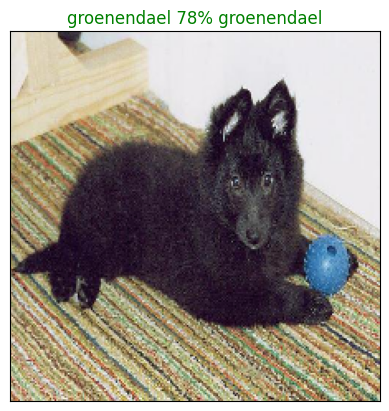

In [53]:
plot_pred(prediction_probabilities=predictions,labels=val_labels,images=val_images,n=77)

In [54]:
def plot_pred_conf(predictions_probabilities,labels,n=1):
    pred_prob,true_label=predictions_probabilities[n],labels[n]
    
    pred_label=get_pred_label(pred_prob)
    
    # top 10 prediction confidence indexes
    top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
    
    # find the top 10 prediction cofidence values
    top_10_pred_value=pred_prob[top_10_pred_indexes]
    
    # find top 10 prediction labels
    top_10_pred_labels=unique_breeds[top_10_pred_indexes]
    
    top_plot=plt.bar(np.arange(len(top_10_pred_labels)),top_10_pred_value,color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),labels=top_10_pred_labels,rotation="vertical")
    
    if np.isin(true_label,top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
    else:
        pass

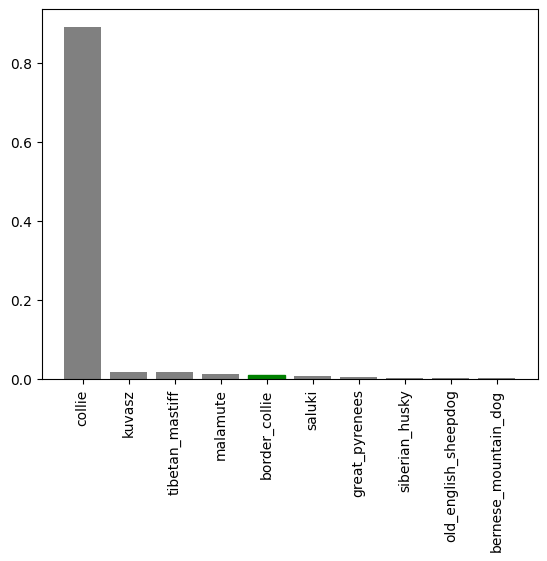

In [55]:
plot_pred_conf(predictions_probabilities=predictions,labels=val_labels,n=9)

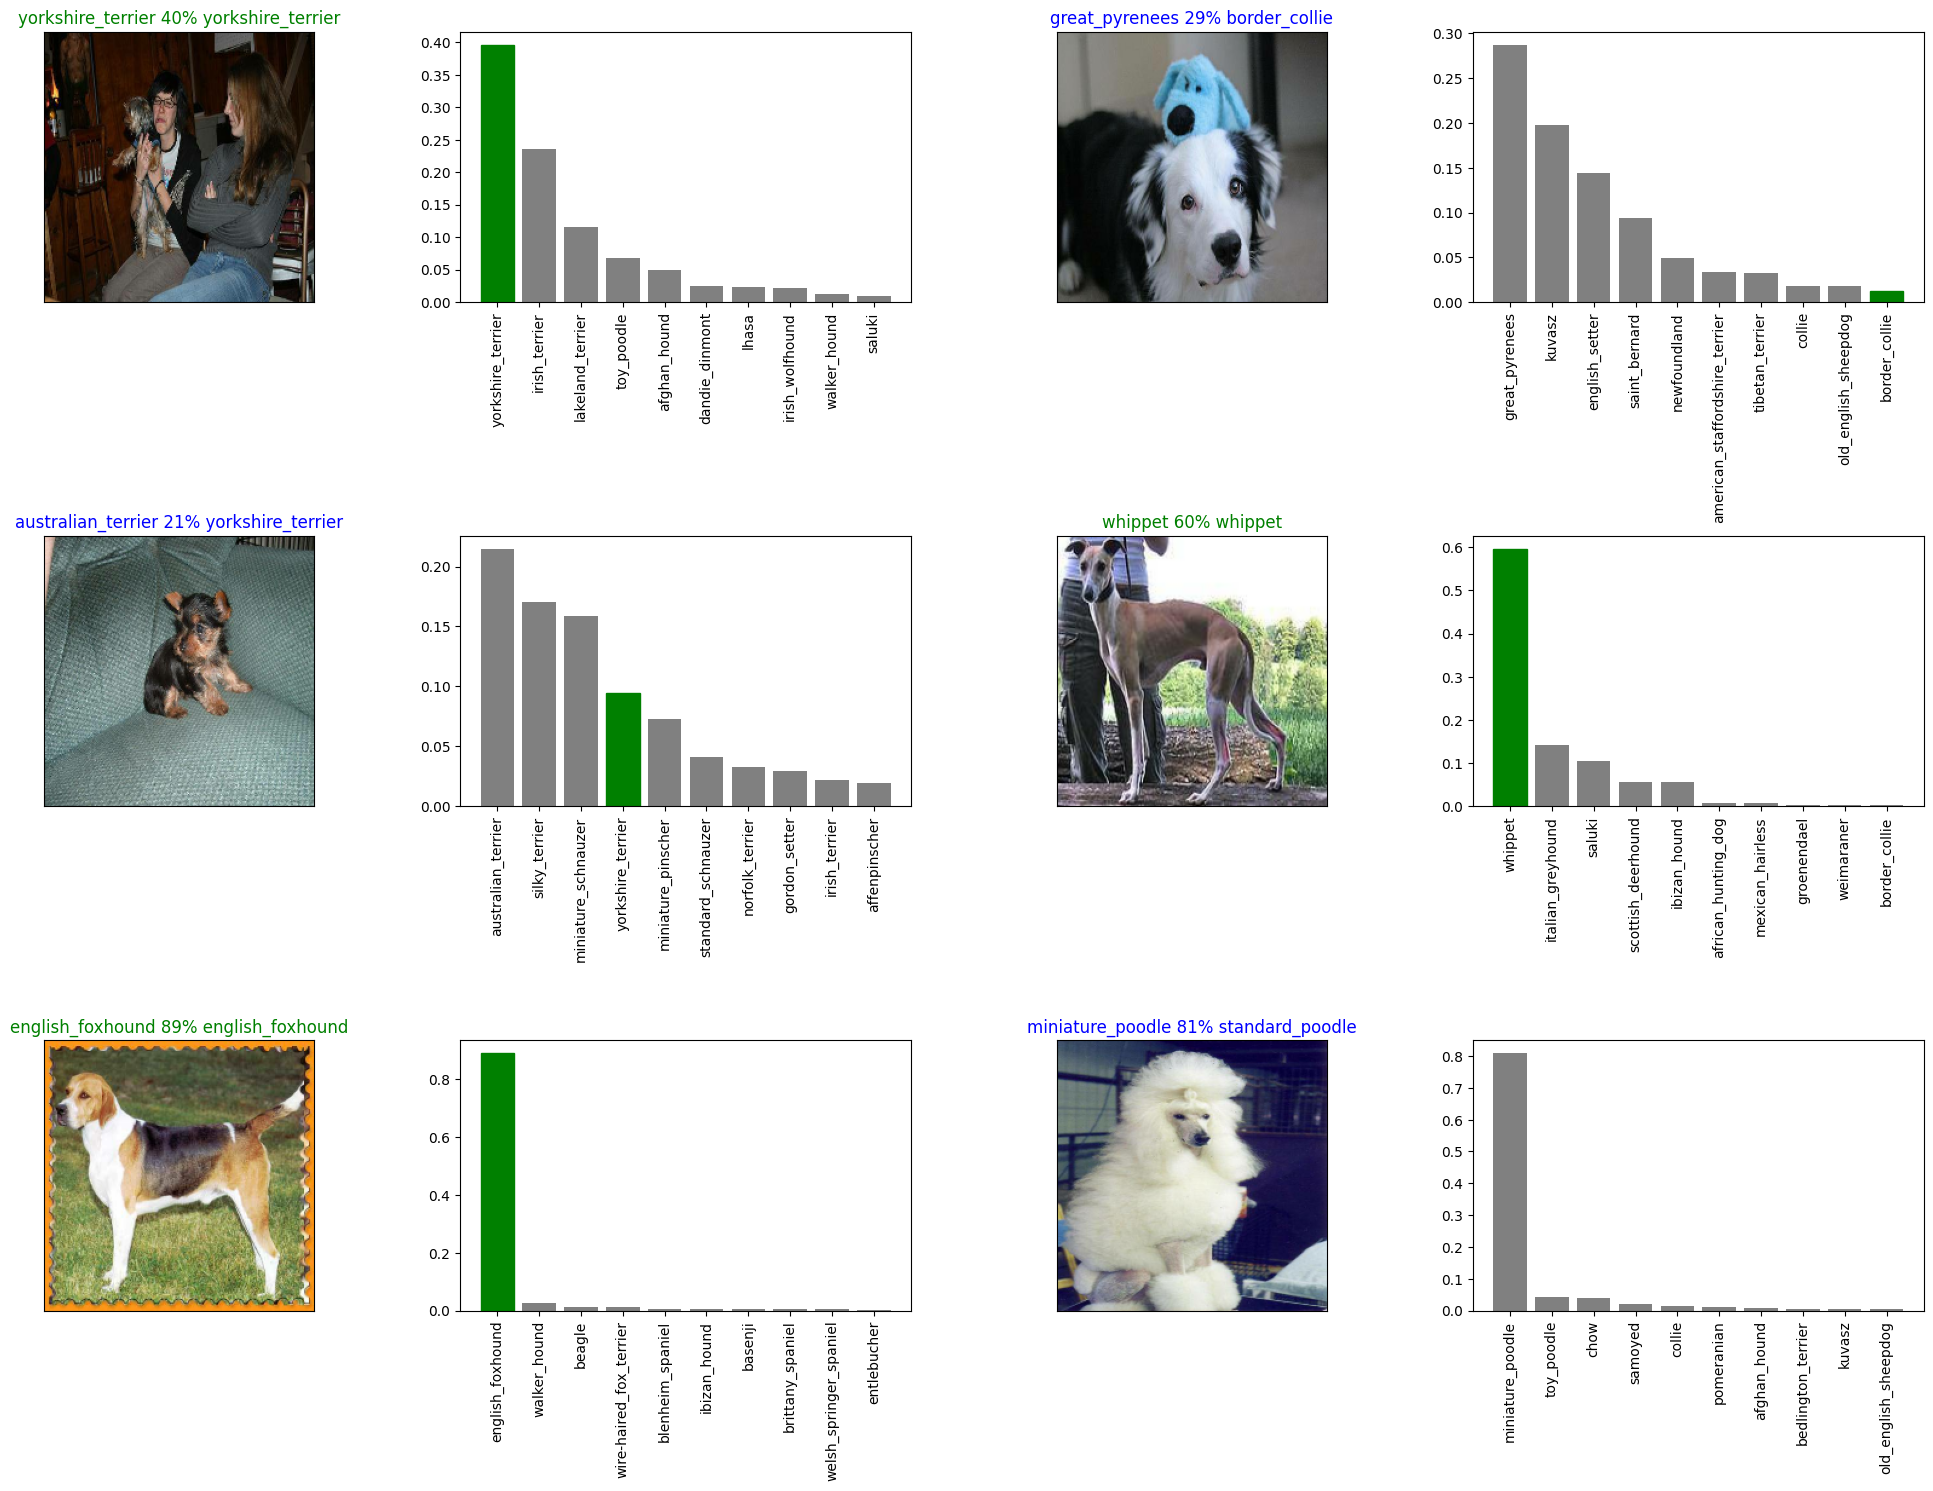

In [56]:
# check few predictions and their different values
i_multiplier=10
num_rows=3
num_cols=2
num_images=num_cols*num_rows
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_pred(prediction_probabilities=predictions,labels=val_labels,images=val_images,n=i+i_multiplier)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_pred_conf(predictions_probabilities=predictions,labels=val_labels,n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [70]:
def save_model(model,suffix=None):
    modeldir=os.path.join("./dog-breed-identification/models",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path=modeldir+ "-" + suffix + ".h5"
    print(f"Sving model to:{model_path}")
    model.save(model_path)
    return model_path

In [71]:
def load_model(model_path):
    print(f"Loading saved model from :{model_path}")
    model=tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [72]:
save_model(model,suffix="1000-images-mobilenetv2-Adam")

Sving model to:./dog-breed-identification/models\20230918-173607-1000-images-mobilenetv2-Adam.h5


c:\Users\Nidhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'./dog-breed-identification/models\\20230918-173607-1000-images-mobilenetv2-Adam.h5'

In [76]:
#load a train model
loaded_1000_image_model=load_model('./dog-breed-identification/models\\20230918-173607-1000-images-mobilenetv2-Adam.h5')

Loading saved model from :./dog-breed-identification/models\20230918-173607-1000-images-mobilenetv2-Adam.h5


In [77]:
model.evaluate(val_data)

7/7 [==============================] - 4s 479ms/step - loss: 1.2804 - accuracy: 0.7000


[1.2803634405136108, 0.699999988079071]

In [78]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 5s 516ms/step - loss: 1.2804 - accuracy: 0.7000


[1.2803634405136108, 0.699999988079071]

In [79]:
# data batch with full data batch
full_data=create_data_batches(X,y)

Creating training data batches..


In [80]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [81]:
full_model=create_models()

Building model with:https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [82]:
# Create full model callbacks
full_model_tensorboard=create_tensorboard_callback()
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [83]:
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 447s 1s/step - loss: 1.3398 - accuracy: 0.6687
Epoch 2/100
320/320 [==============================] - 221s 689ms/step - loss: 0.3986 - accuracy: 0.8807
Epoch 3/100
320/320 [==============================] - 220s 688ms/step - loss: 0.2335 - accuracy: 0.9383
Epoch 4/100
320/320 [==============================] - 1793s 6s/step - loss: 0.1525 - accuracy: 0.9638
Epoch 5/100
320/320 [==============================] - 155s 484ms/step - loss: 0.1070 - accuracy: 0.9769
Epoch 6/100
320/320 [==============================] - 154s 481ms/step - loss: 0.0757 - accuracy: 0.9873
Epoch 7/100
320/320 [==============================] - 154s 483ms/step - loss: 0.0577 - accuracy: 0.9917
Epoch 8/100
320/320 [==============================] - 154s 481ms/step - loss: 0.0455 - accuracy: 0.9940
Epoch 9/100
320/320 [==============================] - 224s 701ms/step - loss: 0.0367 - accuracy: 0.9965
Epoch 10/100
320/320 [==============================] - 255s

In [84]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Sving model to:./dog-breed-identification/models\20230918-191335-full-image-set-mobilenetv2-Adam.h5


c:\Users\Nidhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'./dog-breed-identification/models\\20230918-191335-full-image-set-mobilenetv2-Adam.h5'

In [86]:
# Load in the full model
loaded_full_model = load_model('./dog-breed-identification/models\\20230918-191335-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from :./dog-breed-identification/models\20230918-191335-full-image-set-mobilenetv2-Adam.h5


Make predictions on test dataset

In [88]:
# Load test image file names
test_path="./dog-breed-identification/test/"
test_filenames=[test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['./dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 './dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg',
 './dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 './dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 './dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 './dog-breed-identification/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 './dog-breed-identification/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 './dog-breed-identification/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 './dog-breed-identification/test/002f80396f1e3db687c5932d7978b196.jpg',
 './dog-breed-identification/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [89]:
len(test_filenames)

10357

In [91]:
test_data=create_data_batches(test_filenames,test_data=True)

creating test data batches...


In [92]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [94]:
# Make predictions on test data batch using the loaded full model
test_predictions=loaded_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 170s 524ms/step


In [95]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("./dog-breed-identification/preds_array.csv",test_predictions, delimiter=",")

In [96]:
test_predictions=np.loadtxt("./dog-breed-identification/preds_array.csv",delimiter=",")

In [99]:
test_predictions.shape

(10357, 120)

In [100]:
# create a pandas dataframe
preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [104]:
# Append test image ID's to predictions DataFrame
test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"]=test_ids

In [105]:
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [106]:
# Add predictions probabilities
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   7.055167e-12  9.127047e-13   
1  00102ee9d8eb90812350685311fe5890   2.761812e-06  2.185786e-06   
2  0012a730dfa437f5f3613fb75efcd4ce   1.767653e-11  7.427190e-07   
3  001510bc8570bbeee98c8d80c8a95ec1   8.445995e-07  6.096716e-07   
4  001a5f3114548acdefa3d4da05474c2e   9.648385e-05  5.096155e-06   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.921866e-14  1.885477e-14                    3.223957e-14   
1         3.296698e-08  5.096119e-09                    2.687484e-06   
2         2.299135e-08  1.074218e-10                    9.007603e-11   
3         3.415530e-06  1.744843e-06                    2.921527e-06   
4         1.779908e-08  1.276302e-09                    7.474185e-10   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.413171e-12        6.580476e-17  1.013222e-13  9.733288e-14  ...   
1  1.941914e-08        2.989306e-06  3.811073e-07  3.891000e-08  ...   
2  3.384163e-08        2.691199e-11  1.269967e-11  3.719647e-09  ...   
3  5.644550e-07        1.102757e-10  1.514849e-08  9.103511e-08  ...   
4  4.694840e-11        9.420542e-10  4.268227e-09  2.709172e-09  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  8.842830e-13  2.384212e-14  1.387686e-14  1.941384e-15  2.069059e-14   
1  1.040759e-08  8.539538e-07  4.541790e-09  1.418886e-05  7.007080e-08   
2  8.915848e-11  2.691447e-10  1.801459e-07  1.975260e-05  2.595103e-07   
3  1.922080e-06  2.059400e-10  9.495567e-06  8.941892e-10  3.061036e-06   
4  1.032316e-07  1.818581e-10  2.858029e-10  6.617767e-11  1.742726e-09   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            3.046956e-13                 1.646618e-13  8.190453e-14   
1            8.329025e-07                 3.413326e-04  4.732231e-11   
2            1.835144e-07                 9.047253e-12  1.655174e-06   
3            5.906511e-10                 5.788852e-15  1.421735e-02   
4            2.866595e-10                 7.018290e-11  7.964633e-08   

   wire-haired_fox_terrier  yorkshire_terrier  
0             7.083892e-11       6.385469e-12  
1             2.063331e-07       2.694665e-09  
2             1.115948e-10       1.436966e-11  
3             2.554488e-10       3.353630e-07  
4             3.379511e-10       9.968028e-08  

[5 rows x 121 columns]

In [107]:
preds_df.to_csv("./dog-breed-identification/full_model_predictions.csv",index=False)

*Custom Images*

In [108]:
custom_paths=("./dog-breed-identification/dog_image/")
custom_image_paths=[custom_paths  + fname for fname in os.listdir(custom_paths)]

In [109]:
custom_image_paths

['./dog-breed-identification/dog_image/dog.jpg']

In [110]:
custom_data=create_data_batches(custom_image_paths,test_data=True)
custom_data

creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [111]:
# Make predictions on custom data
custom_preds=loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 189ms/step


In [112]:
custom_preds.shape

(1, 120)

In [113]:
custom_pred_labels=[get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['labrador_retriever']

In [114]:
# Get custom images
custom_images=[]
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

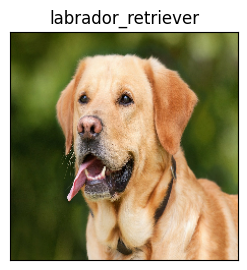

In [115]:
# custom image predictions
plt.figure(figsize=(10,10))
for i,image in enumerate(custom_images):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)